In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read the dataset and make the first column as the default index column
data_csv = pd.read_csv('avocado.csv',index_col=0)

In [3]:
#Checking for any missing values
data_csv.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [4]:
data_csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 11
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.9+ MB


In [5]:
#DATA SHAPE:
row, columns = data_csv.shape
print("Data Row:", row)
print("Data Columns:", columns)

Data Row: 18249
Data Columns: 13


In [6]:
# Count of each type in the data set to find which is more in demand
count_of_type=pd.crosstab(index=data_csv['type'],columns='count',dropna=True)
print(count_of_type)

col_0         count
type               
conventional   9126
organic        9123


In [7]:
# Count of each region in the data set
count_of_region=pd.crosstab(index=data_csv['region'],columns='count',dropna=True)
print(count_of_region)

col_0                count
region                    
Albany                 338
Atlanta                338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
CincinnatiDayton       338
Columbus               338
DallasFtWorth          338
Denver                 338
Detroit                338
GrandRapids            338
GreatLakes             338
HarrisburgScranton     338
HartfordSpringfield    338
Houston                338
Indianapolis           338
Jacksonville           338
LasVegas               338
LosAngeles             338
Louisville             338
MiamiFtLauderdale      338
Midsouth               338
Nashville              338
NewOrleansMobile       338
NewYork                338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
P

In [9]:
#To study coorelation between all the varibles
num_data=data_csv.select_dtypes(exclude=[object])
corr_matrix= num_data.corr()
print(corr_matrix)

              AveragePrice  Total Volume      4046      4225      4770  \
AveragePrice      1.000000     -0.192752 -0.208317 -0.172928 -0.179446   
Total Volume     -0.192752      1.000000  0.977863  0.974181  0.872202   
4046             -0.208317      0.977863  1.000000  0.926110  0.833389   
4225             -0.172928      0.974181  0.926110  1.000000  0.887855   
4770             -0.179446      0.872202  0.833389  0.887855  1.000000   
Total Bags       -0.177088      0.963047  0.920057  0.905787  0.792314   
Small Bags       -0.174730      0.967238  0.925280  0.916031  0.802733   
Large Bags       -0.172940      0.880640  0.838645  0.810015  0.698471   
XLarge Bags      -0.117592      0.747157  0.699377  0.688809  0.679861   
year              0.093197      0.017193  0.003353 -0.009559 -0.036531   

              Total Bags  Small Bags  Large Bags  XLarge Bags      year  
AveragePrice   -0.177088   -0.174730   -0.172940    -0.117592  0.093197  
Total Volume    0.963047    0.967238 

# EXPLORATORY DATA ANALYSIS

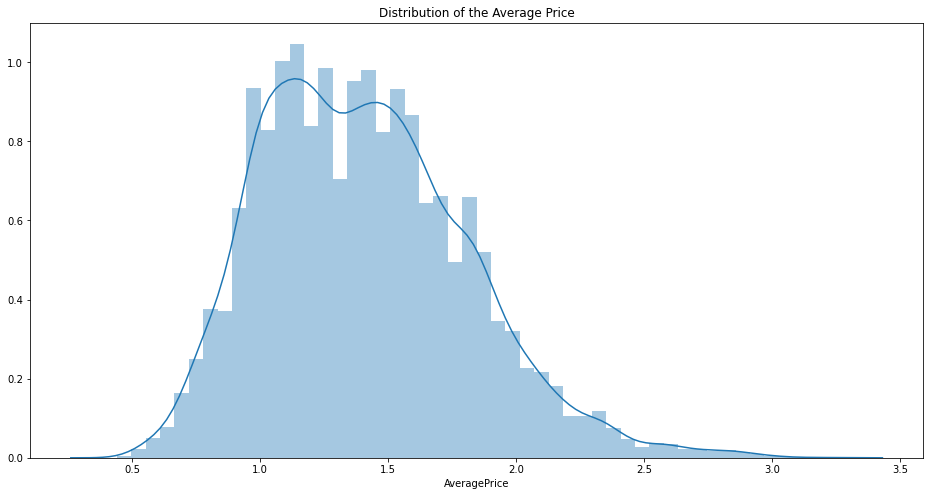

In [10]:
#FREQUENCY OF AVERAGE PRICE
plt.figure(figsize=(16,8))
plt.title("Distribution of the Average Price")
sns.distplot(data_csv["AveragePrice"])
plt.show()

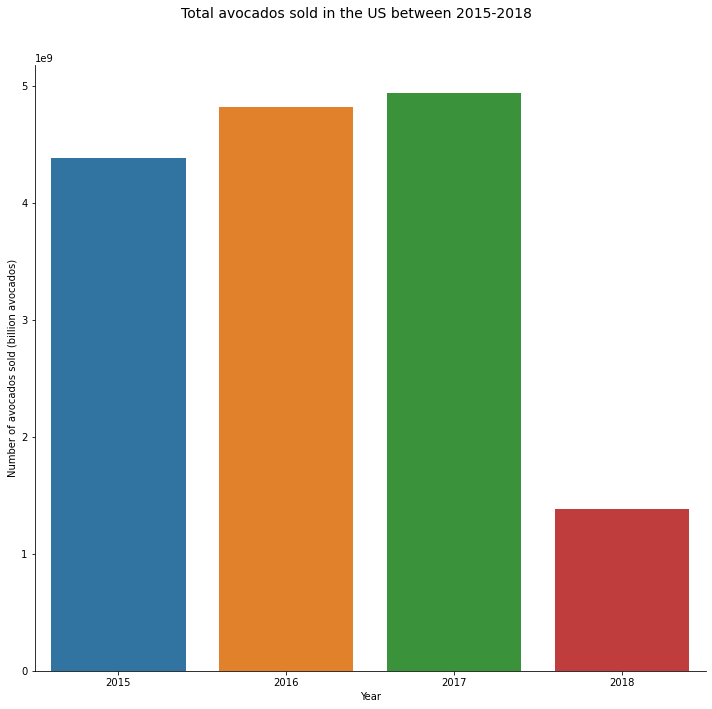

In [11]:
#AVOCADOS SOLD IN 2015-2018
quantity_per_year= data_csv.groupby('year')['Total Volume'].sum().reset_index()
sns.catplot(x='year', y='Total Volume', kind='bar', data=quantity_per_year, height=10)
plt.xlabel('Year')
plt.ylabel('Number of avocados sold (billion avocados)')
plt.subplots_adjust(top=0.9)
plt.suptitle('Total avocados sold in the US between 2015-2018',  size=14)
plt.show()

Text(0.5, 1.0, 'Average Price of Avocado According to Region')

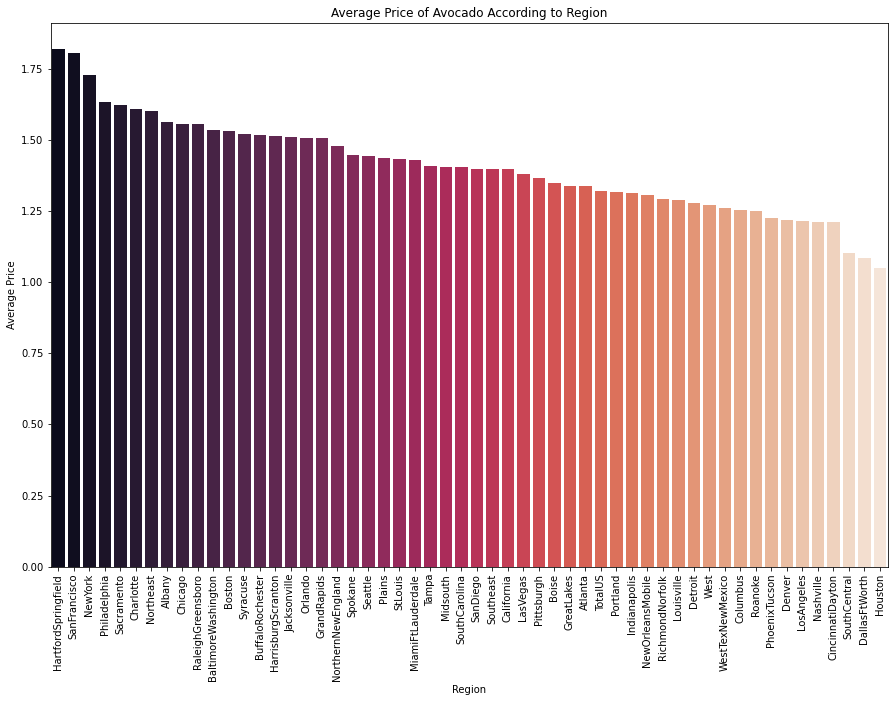

In [12]:
#AVERAGE PRICE OF AVOCADO ACCORDING TO REGION
region_list=list(data_csv.region.unique())
average_price=[]

for i in region_list:
    x=data_csv[data_csv.region==i]
    region_average=sum(x.AveragePrice)/len(x)
    average_price.append(region_average)

df1=pd.DataFrame({'region_list':region_list,'average_price':average_price})
new_index=df1.average_price.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)

plt.figure(figsize=(15,10))
ax=sns.barplot(x=sorted_data.region_list,y=sorted_data.average_price,palette='rocket')

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')

Text(0.5, 1.0, 'Average Price of Avocado According to Types')

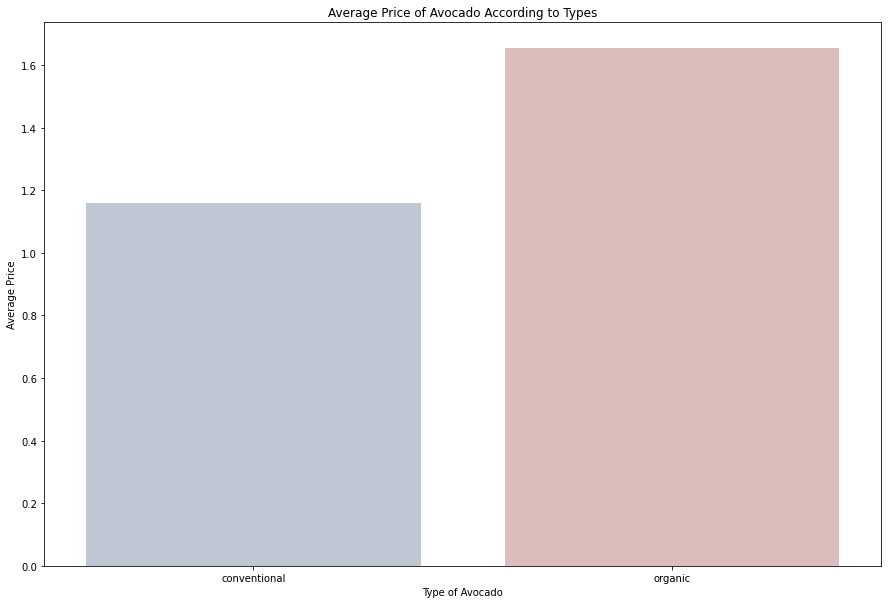

In [13]:
#AVERAGE PRICE OF AVOCADO ACCORDING TO TYPES(CONVENTIONAL/ORGANIC)
type_list=list(data_csv.type.unique())
average_price2=[]

for i in type_list:
    x=data_csv[data_csv.type==i]
    average_price2.append(sum(x.AveragePrice)/len(x))
df2=pd.DataFrame({'type_list':type_list,'average_price':average_price2})

plt.figure(figsize=(15,10))
ax=sns.barplot(x=df2.type_list,y=df2.average_price,palette='vlag')
plt.xlabel('Type of Avocado')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Types')

Text(0.5, 1.0, 'Average Price of Avocado According to Years')

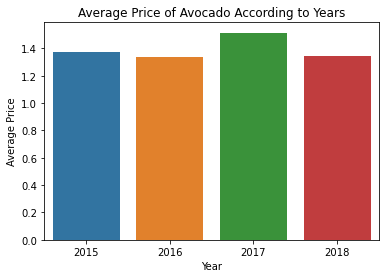

In [14]:
#AVERAGE PRICE ACCORDING TO YEARS
year_list=list(data_csv.year.unique())
average_price3=[]

for i in year_list:
    x=data_csv[data_csv.year==i]
    average_price3.append(sum(x.AveragePrice)/len(x))
df3=pd.DataFrame({'year_list':year_list,'average_price':average_price3})

plt.figure()
ax=sns.barplot(x=df3.year_list,y=df3.average_price)
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Years')

Text(0.5, 1.0, 'Average of Total Volume According to Region')

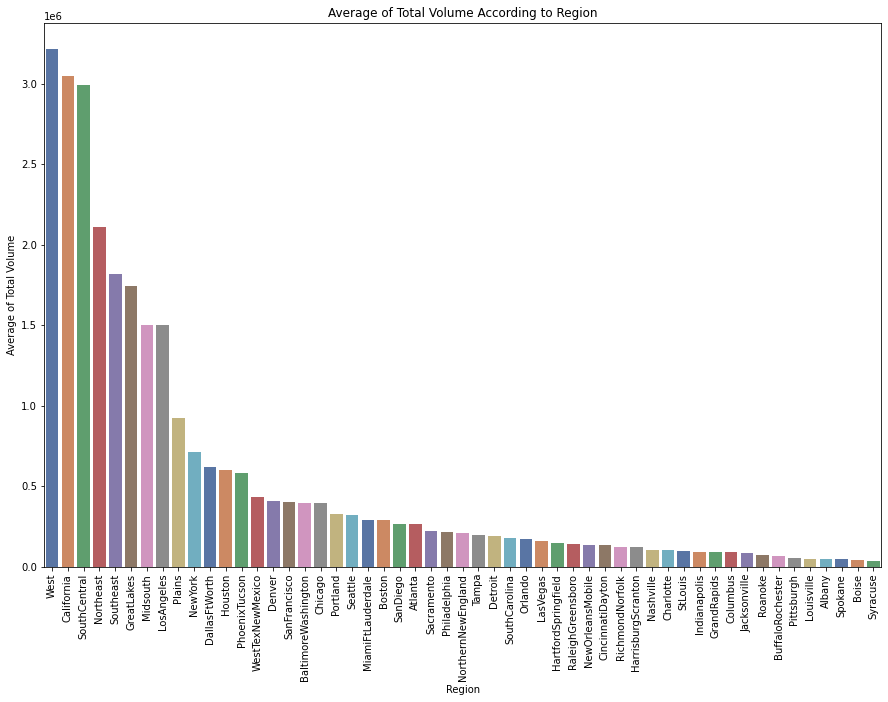

In [15]:
#AVERAGE OF TOTAL VOLUME ACCORDING TO REGION
filter1=data_csv.region!='TotalUS'
data1=data_csv[filter1]


region_list=list(data1.region.unique())
average_total_volume=[]

for i in region_list:
    x=data1[data1.region==i]
    average_total_volume.append(sum(x['Total Volume'])/len(x))
df4=pd.DataFrame({'region_list':region_list,'average_total_volume':average_total_volume})

new_index=df4.average_total_volume.sort_values(ascending=False).index.values
sorted_data1=df4.reindex(new_index)

plt.figure(figsize=(15,10))
ax=sns.barplot(x=sorted_data1.region_list,y=sorted_data1.average_total_volume,palette='deep')

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average of Total Volume')
plt.title('Average of Total Volume According to Region')

Text(0.5, 1.0, 'Average of Total Volume According to Types')

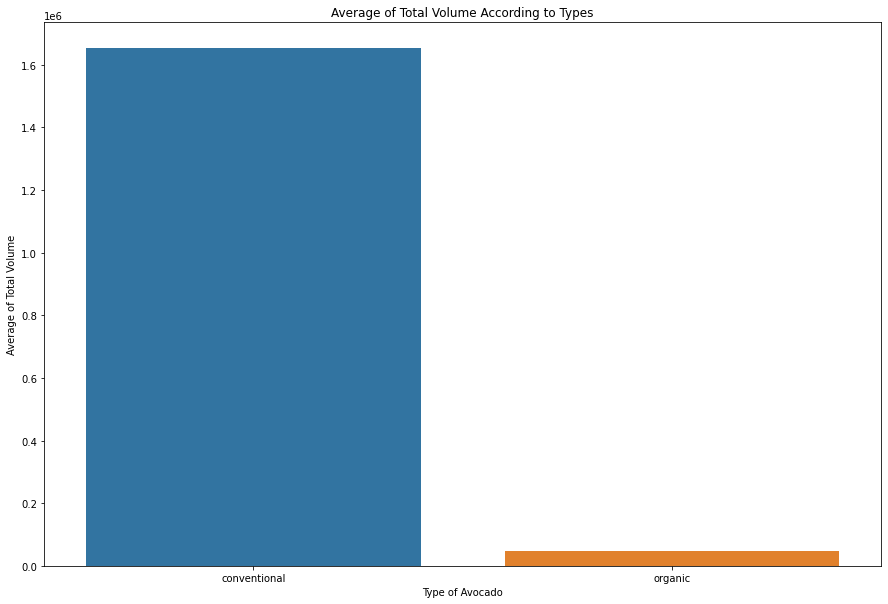

In [16]:
#AVERAGE OF TOTAL VOLUME ACCORDİNG TO TYPE(CONVENTIONAL/ORGANIC)
type_list1=list(data_csv.region.unique())
average_total_volume1=[]

for i in type_list:
    x=data_csv[data_csv.type==i]
    average_total_volume1.append(sum(x['Total Volume']/len(x)))
df5=pd.DataFrame({'type_list':type_list,'average_total_volume1':average_total_volume1})

plt.figure(figsize=(15,10))
ax=sns.barplot(x=df5.type_list,y=df5.average_total_volume1)
plt.xlabel('Type of Avocado')
plt.ylabel('Average of Total Volume')
plt.title('Average of Total Volume According to Types')

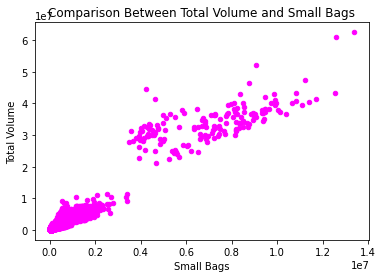

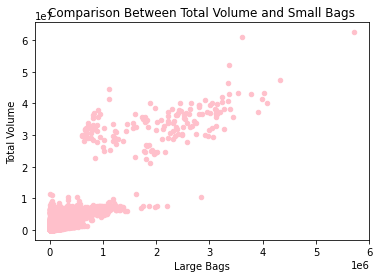

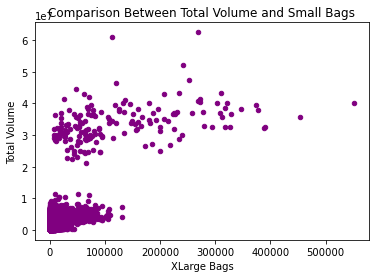

In [17]:
#COMPARISION B/W TOTAL VOLUME & SMALL BAGS
data_csv.plot(kind = 'scatter', x = 'Small Bags', y = 'Total Volume', color = 'magenta')
plt.xlabel('Small Bags')
plt.ylabel('Total Volume')
plt.title("Comparison Between Total Volume and Small Bags")
plt.show()

#COMPARISION B/W TOTAL VOLUME & LARGE BAGS
data_csv.plot(kind = 'scatter', x = 'Large Bags', y = 'Total Volume', color = 'pink')
plt.xlabel('Large Bags')
plt.ylabel('Total Volume')
plt.title("Comparison Between Total Volume and Small Bags")
plt.show()

#COMPARISION B/W TOTAL VOLUME & XLARGE BAGS
data_csv.plot(kind = 'scatter', x = 'XLarge Bags', y = 'Total Volume', color = 'purple')
plt.xlabel('XLarge Bags')
plt.ylabel('Total Volume')
plt.title("Comparison Between Total Volume and Small Bags")
plt.show()